In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
data.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [13]:
# Logistic Regression 
features = data.iloc[:,:-1].values
label = data.iloc[:,[-1]].values

In [19]:
# Categorical does not matter
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(features,label,
                                                test_size = 0.2,
                                                random_state = 13)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\CZL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CZL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\CZL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
print(model.score(X_train,Y_train))
print(model.score(X_test,Y_test))

0.9583333333333334
0.9666666666666667


In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (label,model.predict(features))
cm

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]], dtype=int64)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors = 7)
model1.fit(X_train,Y_train)


C:\Users\CZL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [25]:
print(model1.score(X_train,Y_train))
print(model1.score(X_test,Y_test))

0.975
1.0


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label,model1.predict(features))
cm

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  2, 48]], dtype=int64)

In [27]:
data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [28]:
data.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,model1.predict(X_test)))
print(classification_report(label,model1.predict(features)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.98      0.97        50
   virginica       0.98      0.96      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [35]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc

label
Y = label_binarize(label,classes = ['setosa','versicolor','virginica'])
n_classes = 3

# shuffle & split training & testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(features,Y,
                                                test_size = 0.2,
                                                random_state = 13)

In [37]:
# Classifier
clf = OneVsRestClassifier(LogisticRegression())
Y_score = clf.fit(X_train,Y_train).decision_function(X_test)

C:\Users\CZL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CZL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CZL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
# compute ROC curve and ROC area for each
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range (n_classes):
    fpr[i],tpr[i],_ = roc_curve(Y_test[:,i],Y_score[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])

C:\Users\CZL\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'Lower right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


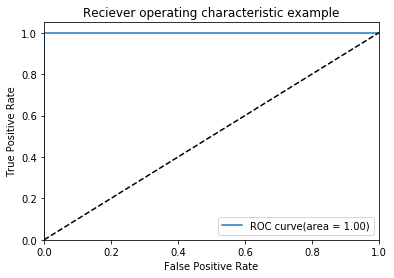

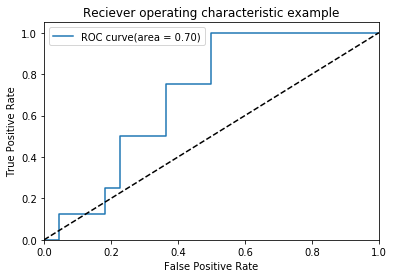

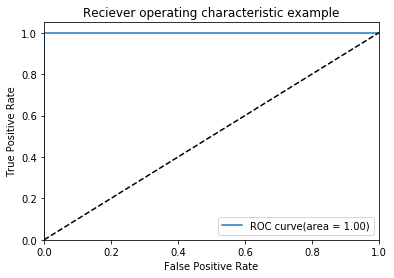

In [40]:
# plot ROC Curve for specific class
for i in range (n_classes):
    plt.figure()
    plt.plot(fpr[i],tpr[i],label = 'ROC curve(area = %0.2f)'% roc_auc[i])
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characteristic example')
    plt.legend(loc = 'Lower right')
    plt.show()